In [11]:
import requests, time, re, jieba
import jieba.analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import *
from PIL import Image
from bs4 import BeautifulSoup
from matplotlib import colors
from collections import Counter # 次數統計
from ckiptagger import WS
from snownlp import SnowNLP
# conda install -c conda-forge wordcloud=1.6.0 
from wordcloud import WordCloud, ImageColorGenerator

<html>
    <h1>爬蟲</h1>
</html>

In [12]:
title = []
urls = []

# 熱門版
u = "https://www.ettoday.net/news/hot-news.htm"
res = requests.get(u)
soup = BeautifulSoup(res.content, "lxml")
soup = soup.find_all("div", class_="piece clearfix")

domian = "https://www.ettoday.net"
for i in range(len(soup)) :
    if len(urls) < 50 :
        url = "https://www.ettoday.net" + soup[i].select("a")[0]["href"]
        urls.append(url)
        t = soup[i].select_one("h3").text
        title.append(t)

# 抓內文
allcontent = []
for u in urls:
    content = []
    res = requests.get(u)
    soup = BeautifulSoup(res.content, "lxml")
    try:
        soup = soup.find("div", class_="story")
        for a in soup.find_all("p"):
            p = a.text
            check = 0
            for f in range(0, len(p)-1) :
                if p[f:f+2] == '圖／' or p[f] == '▲' or p[f] == '►' or p[f] == '▼':
                    check = 1
            if check != 1 and len(p) > 1:
                content.append(p)
        content_str = ''
        for i in range(1, len(content)) :
            content_str = content_str + ' ' + content[i]
        allcontent.append(content_str)
        
        time.sleep(2)
    except:
        pass
if len(urls) == len(title) == len(allcontent) :
    print('OK')

OK


In [13]:
# 網址 + 標題 + 內文
for i in range(len(allcontent)) :
    print(urls[i] + '\n' + title[i] + '\n' + allcontent[i])
    print('--------------------------------------------------------------------------------------------------------------')

https://www.ettoday.net/news/20220613/2271742.htm
快訊／首見BA.4、BA.5入侵「一次爆5例」　今增109死、本土45081例
 中央流行疫情指揮中心今公布國內新增45081例本土，另增109例死亡。而國內也首見BA.4、BA.5案例，分別是4個BA.5、1個BA.4，分別為4男1女（BA.4），年齡在30~60多歲，BA.5來自美國2例，土耳其和波蘭各1例，BA.4是智利入境。 今日新增45,081例本土病例，為21,513例男性、23,557例女性、11例調查中，年齡介於未滿5歲至90多歲以上，個案分布為高雄市(7,184例)、臺中市(6,694例)、新北市(5,470例)、桃園市(3,971例)、臺南市(3,969例)、彰化縣(3,545例)、臺北市(3,099例)、屏東縣(1,924例)、新竹縣(1,160例)、苗栗縣(1,140例)、雲林縣(1,034例)、南投縣(1,021例)、嘉義縣(849例)、新竹市(792例)、宜蘭縣(723例)、花蓮縣(674例)、基隆市(535例)、嘉義市(518例)、臺東縣(471例)、澎湖縣(199例)、金門縣(97例)、連江縣(12例)。 指揮中心指出，今日新增109例本土病例死亡個案，為61例男性、48例女性，年齡介於40多歲至90多歲以上，皆屬重度感染個案、105例具慢性病史、66例未接種3劑 COVID-19疫苗。確診日介於今(2022)年5月4日至6月9日，死亡日期介於5月19日至6月10日。 指揮中心說明，今日新增29例境外移入個案中，為20例男性、9例女性，年齡介於未滿5歲至60多歲，分別自越南(3例)、土耳其及德國(各2例)移入，另22例感染國家調查中。入境日介於今年6月11日至6月12日。
--------------------------------------------------------------------------------------------------------------
https://www.ettoday.net/news/20220613/2271579.htm
小甜甜結婚1年怒要離婚：沒想到那麼快！　「列老公4罪狀」當眾飆髒話
 小甜甜（張可昀）婚後育有一個女兒，時常透過社群平台分享家庭生活，先前才自爆新手媽

<html>
    <h1>標題前十大字彙(檢視出現最多的十個「字」是哪些)</h1>
</html>

In [14]:
# 去除標點符號+數字+英文字母的標題&文章
titles = str(title)
titles1 = ''.join(char for char in titles if char.isalnum())
titles2 = ''.join([i for i in titles1 if not i.isdigit()])
titles3 = re.sub('[a-zA-Z]','',titles2)

# 每個字出現次數
wordt = {}
for w in titles3:
    if w not in wordt:
        wordt[w] = 1
    else :    
        wordt[w] = wordt[w] + 1

In [19]:
sortwordt = sorted(wordt.items(), key = lambda x : x[1], reverse = True)[:10]
str_w = sortwordt[0][0]
for i in range(1, len(sortwordt)) :
    str_w = str_w + sortwordt[i][0]
print('ETToday標題前十大字彙為：' + str_w)

ETToday標題前十大字彙為：了年女一大星曝小到公


# 文字雲

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\acer\AppData\Local\Temp\jieba.cache
Loading model cost 0.718 seconds.
Prefix dict has been built successfully.


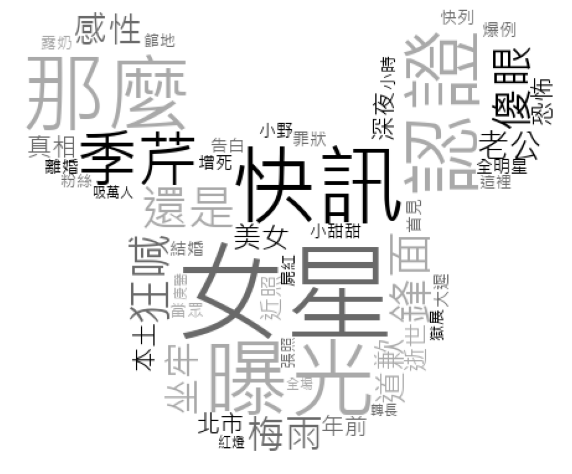

In [16]:
# 去除標點符號+數字+英文字母的標題&文章
titles1 = ''.join(char for char in str(title) if char.isalnum())
titles2 = ''.join([i for i in titles1 if not i.isdigit()])
titles = re.sub('[a-zA-Z]','',titles2)

tags = jieba.analyse.extract_tags(titles, topK=50, withWeight=True)
dictionary = {}
for i in range(len(tags)) :
    dictionary[tags[i][0]] = tags[i][1]

# 設定文字雲細項
color_list=['#000000','#A9A9A9','#696969']# 建立顏色數組，更改字體顏色
colormap=colors.ListedColormap(color_list)
fontpath = "C:/test-wordcloud/msjh.ttc"  # 字型檔
mask = np.array(Image.open("C:/mickey.png")) # 文字雲樣式
wordcloud = WordCloud(background_color="white", colormap=colormap, mask=mask, font_path=fontpath)
wc = wordcloud.generate_from_frequencies(dictionary)

plt.figure(figsize=(10,10))
plt.imshow(wc), plt.axis("off")
plt.show()

# 會存在下載中，注意檔名重複問題
wc.to_file('et_wordcloud.jpg')

　　由於標題以較少字數概要的說明新聞內容，更需精簡選擇用字，因此比較不會出現代名詞、 虛字等功能性用字。另一個比較有趣的現象是各家單字前十名，皆包含「死」或「曝」。雖然現今新聞寫稿越來越嚴謹，但許多新聞為了吸引民眾的點閱來提高流量，使用較為誇張、聳動的字或詞。在這些用字和用詞下，乍看下讓你很想點進去看的標題，點進去後卻發現文不對題。時間一久，讀者會對該媒體產生不信任感。<br>

　　因此，我們使用文字探勘技術，以精確度來了解台灣網路媒體前三名新聞網標題用字和用詞與內文是否相符，另外，也透過情緒分析新聞網的立場是否中立，並依照分析出的結果來提供民眾選擇傾向的新聞風格。

#  平均精確度  --- 餘弦相似、相符合程度

In [17]:
# 剔除標點符號、數字及英文
stop_word01 = ['「', '」',' ' , '（' , '）' , '／'  , '：'  , '-' ,'，','。','\n','\r','！','\u3000', '？', '《', '》', '.']
def clearData(news , stop_words):
    result = ''
    re1 = re.sub('[a-zA-Z]','',news)
    for w in re1 :
        if w not in stop_words : 
            result = result + w 
    return result

# 內文
token_c=[]
for i in allcontent:
    token_c.append(clearData(i,stop_word01))

# 標題
token_t=[]
for i in title:
    token_t.append(clearData(i,stop_word01))

## CKIP斷詞

In [18]:
ws_title=[]
ws_content=[]
for i in range(len(token_t)) :
    title_text = token_t[i]
    content_text = token_c[i]
    
    ws = WS("C:\\Users\\acer\\Downloads\\data")
    
    ws_title.append(ws([title_text]))
    ws_content.append(ws([content_text]))

C:\Anaconda3\envs\Py38\lib\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
C:\Anaconda3\envs\Py38\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:984: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._kernel = self.add_variable(
C:\Anaconda3\envs\Py38\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:993: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._bias = self.add_variable(


## Cosine Similarity(餘弦相似)，需要計算 A、B 兩向量的 dot 值、以及 A、B 兩向量的長度
#### - 夾角越大，代表兩個向量越是不像；
#### - 夾角越小，代表兩個向量越是相像
### Cosine Similarity值越大,標題與內文越相似

In [20]:
veclist_title=[]      # 標題內文向量存取陣列
veclist_content=[]

for a in range(len(ws_title)):
    countword={}      #統計標題斷詞在內文斷詞中出現次數
    for i in ws_title[a][0]:
        countword[i]=0
        for j in ws_content[a][0]:
            if i.__eq__(j):
                if i not in countword:
                        countword[i] = 1
                else:
                        countword[i] +=1
        
    vector_content=[]
    vector_title=[]
    for k,v in countword.items():
        vector_content.append(countword.get(k))     # content 次數向量
        vector_title.append(1)                      # title   次數向量 (因以標題為主要判斷出現次數之文字依據,故向量值皆為1
        
    veclist_content.append(vector_content)  # 加入標題內文向量存取陣列
    veclist_title.append(vector_title)    

In [21]:
CS = 0
Co0 = 0
for i in range(len(veclist_title)):
    # Dot and norm
    dot = sum(a*b for a, b in zip(veclist_content[i], veclist_title[i]))
    norm_a = sum(a*a for a in veclist_content[i]) ** 0.5
    norm_b = sum(b*b for b in veclist_title[i]) ** 0.5
    
    # Cosine similarity
    if norm_a == 0 or norm_b == 0 :
        cos_sim = 0
        Co0 += 1
    else :
        cos_sim = dot / (norm_a*norm_b)
    CS += cos_sim
    
avg_CS = CS / (len(veclist_title)-Co0)
print('ETtoday餘弦相符合程度:', '%.2f%%' % (avg_CS * 100))

ETtoday餘弦相符合程度: 62.79%


<html>
    <h1>情緒分析</h1>
</html>

In [22]:
text = str(allcontent)
stopword = ['，', '。', '、', '「', '」', '！', '；', '：']

index = [0] 
for i in range(len(text)) :
    if text[i] in stopword :
        index.append(i)
lines = []     
for i in range(len(index)-1) :
    start = index[i] + 1
    end = index[i+1]
    if len(text[start:end]) > 1 :
        lines.append(text[start:end])

values = []
for line in lines :
    values.append(SnowNLP(line).sentiments)

posi = 0
nega = 0
for i in values:
    if (i >= 0.5):
        posi += 1
    else:
        nega += 1

rate = posi / (posi+nega)
print('此新聞網正面用句的比例 : ','%.2f%%' % (rate * 100)) # 格式化為百分比

此新聞網正面用句的比例 :  43.69%


# 將資料放進Excel

In [24]:
wb = load_workbook(r'C:\\Users\\acer\\OneDrive\\桌面\\daily information.xlsx')
ws = wb.active

date = input('請輸入今天日期與時間，例：06/09 12:00：')
num = int(input('這是第幾筆資料，例：1：'))

data1 = '%.2f%%' % (avg_CS * 100)
data2 = '%.2f%%' % (rate * 100)
data3 = str_w

ws.cell(num+2, 1, date)
ws.cell(num+2, 2, data1)
ws.cell(num+2, 3, data2)
ws.cell(num+2, 4, data3)

wb.save(r'C:\\Users\\acer\\OneDrive\\桌面\\daily information.xlsx')
print('done')

請輸入今天日期與時間，例：06/09 12:00：06/13 16:45
這是第幾筆資料，例：1：1
done


# 參考文獻

#### - https://blog.csdn.net/wangzirui32/article/details/118056830 
#### - https://clay-atlas.com/blog/2020/03/26/cosine-similarity-text-count/
#### - https://clay-atlas.com/blog/2019/09/24/python-chinese-tutorial-ckiptagger/
#### - https://blog.csdn.net/miaoxiaowuseng/article/details/107343427
#### - https://www.796t.com/content/1545012004.html
#### - https://pixnashpython.pixnet.net/blog/post/28128736-%E6%96%87%E5%AD%97%E9%9B%B2
#### - https://clay-atlas.com/blog/2019/09/24/python-chinese-tutorial-ckiptagger/
#### - http://csyue.nccu.edu.tw/ch/Taiwan%20Newspapers%20(2020).pdf
#### - https://blog.hashteacher.com/?p=1378
#### - https://www.webucator.com/article/python-color-constants-module/